In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Assignment 3: Part 2 - Cat or Dog?

First I will import relevant packages for checking and changing the working directory, creating
dataframes, loading images to dataframes, and for analyzing the data.

In [2]:
import numpy as np
import pandas as pd
import os
import glob
from numpy import asarray, save, load
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib.pyplot import imshow
from PIL import Image
import matplotlib.pyplot as plt
from shutil import copy, move

Checking the working directory:

In [3]:
os.getcwd()

'C:\\Users\\Wyatt\\Downloads'

The training images are in a different directory, I will change the directory to this path.

In [4]:
os.chdir('./Assignment 3/TrainingImages')

In [5]:
os.getcwd() 

'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\TrainingImages'

I will now create array data and label it according to its file name.

In [6]:
os.chdir(os.getcwd())    

myImgs = []      # For storing the array data for the images
imgLabels = []    # For storing the labels for the data

for filNam in glob.glob('*.jpg'):
    
    theLabel=0
    if filNam.startswith('dog'):
        theLabel=1
    animalImg=load_img(filNam, target_size=(200,200))  
    animalImg=img_to_array(animalImg) 
   
    animalImg=np.divide(animalImg,255.)  # converting pixel size to [0,1]
    myImgs.append(animalImg)
    imgLabels.append(theLabel)

myImgs=asarray(myImgs) #converting to array and storing
imgLabels=asarray(imgLabels) #converting to array and storing

In [7]:
# creating a path to store the arrays
directory = 'training_imgArrayData'
parent_dir = "C:\\Users\\Wyatt\\Downloads\\Assignment 3"
path = os.path.join(parent_dir, directory)
os.mkdir(path)

In [8]:
# storing the arrays in the appropriate locations
os.chdir(path)

save('myImgs.npy',myImgs)
save('imLabels.npy',imgLabels)

In [9]:
# loading the arrays

imgArray=load('myImgs.npy')
labelArray=load('imLabels.npy')

In [10]:
# checking the array shapes

imgArray.shape
labelArray.shape

(5000, 200, 200, 3)

(5000,)

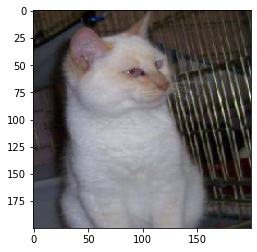

In [11]:
# loading an image

%matplotlib inline
fig = plt.figure()
plt.imshow(imgArray[10,:,:]);

In [12]:
os.getcwd()
os.chdir('..')
os.getcwd()

'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training_imgArrayData'

'C:\\Users\\Wyatt\\Downloads\\Assignment 3'

In [13]:
# creating directories for cat and dog paths

media_directory = 'training media'
media_parent_directory = "C:\\Users\\Wyatt\\Downloads\\Assignment 3"
mediapath = os.path.join(media_parent_directory, media_directory)
os.mkdir(mediapath)
dog_directory = 'dog'
dog_parent_dir = "C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media"
dogpath = os.path.join(dog_parent_dir, dog_directory)
cat_directory = 'cat'
cat_parent_dir = "C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media"
catpath = os.path.join(cat_parent_dir, cat_directory)
os.mkdir(dogpath)
os.mkdir(catpath)

In [ ]:
# copying images from training media to dog and cat path established in previous block

os.chdir('C:\\Users\\Wyatt\\Downloads\\Assignment 3\\TrainingImages')
for filNam in glob.glob('*.jpg'): 
    if filNam.startswith('dog'): copy(filNam,dogpath) 
    else: copy(filNam,catpath)

In [15]:
# creating validation directories for dog and cat titled Vdog and Vcat
Vdog_directory = 'Vdog'
Vdog_parent_dir = "C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media"
Vdogpath = os.path.join(Vdog_parent_dir, Vdog_directory)
os.mkdir(Vdogpath)
Vcat_directory = 'Vcat'
Vcat_parent_dir = "C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media"
Vcatpath = os.path.join(Vcat_parent_dir, Vcat_directory)
os.mkdir(Vcatpath)

In [16]:
os.getcwd()

'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\TrainingImages'

In [17]:
# splitting the data into training and validation data and moving validation files to the appropriate folders

os.chdir('C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\dog')
np.random.seed(77) 
for filNam in glob.glob('*.jpg'): 
    randVal=np.random.random_sample() 
    if (randVal<0.20): 
        os.rename(filNam, 'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Vdog\\'+filNam)
np.random.seed(54) 
os.chdir('C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\cat')
for filNam in glob.glob('*.jpg'): 
    randVal=np.random.random_sample() 
    if (randVal<0.20): 
        os.rename(filNam, 'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Vcat\\'+filNam)

In [18]:
# How many copied?

len(os.listdir('C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Vdog'))

# not copied

len(os.listdir('C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\dog'))

485

2015

In [19]:
# How many copied?

len(os.listdir('C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Vcat'))

# not copies

len(os.listdir('C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\cat'))

520

1980

Now I have established dog, cat, Vdog, and Vcat folders with images assigned. The dog and Vdog folders have 2500 files, as do the cat and Vcat folders.

In [20]:
# creating a training and validation directory

Training_directory = 'Training'
Training_parent_dir = "C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media"
Trainingpath = os.path.join(Training_parent_dir, Training_directory)
os.mkdir(Trainingpath)
Validation_directory = 'Validation'
Validation_parent_dir = "C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media"
Validationpath = os.path.join(Validation_parent_dir, Validation_directory)
os.mkdir(Validationpath)

In [21]:
os.chdir('C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media')

In [22]:
# moving the dog, cat, Vdog, Vcat folders to the appropriate training and validation paths just created.
move(dogpath, Trainingpath)
move(catpath, Trainingpath)
move(Vdogpath,Validationpath)
move(Vcatpath,Validationpath)

'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Training\\dog'

'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Training\\cat'

'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Validation\\Vdog'

'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Validation\\Vcat'

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #loading the image data generator from tensorflow

train_gen = ImageDataGenerator(rescale=1./255) #to rescale the images
val_gen = ImageDataGenerator(rescale=1./255) #to rescale the images

In [24]:
# using the train_gen and val_gen to generate the images to train_generator and validate_generator
train_generator = train_gen.flow_from_directory(
    'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Training',
    target_size=(200,200),
    batch_size=32,
    class_mode='binary'
    )

validate_generator = val_gen.flow_from_directory(
    'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\training media\\Validation',
    target_size=(200,200),
    batch_size=32,
    class_mode='binary'
    )

Found 3995 images belonging to 2 classes.
Found 1005 images belonging to 2 classes.


In [25]:
aFew=5
howMany=0
for data_batch, labels_batch in train_generator:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')
    howMany+=1
    if (howMany >= aFew): 
        break 

data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)
data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)
data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)
data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)
data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)


In [26]:
# importing from tensorflow for analysis
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [27]:
# CNN: one conv layer, one pooling layer, 4 hidden layers
model=models.Sequential()
model.add(layers.Conv2D(32,(4,4),
    activation='relu',
    input_shape=(200,200,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [28]:
# compiling the model with binary_crossentropy and RMS optimizer, metrics designated as accuracy
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [ ]:
# assigning the model results to history

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validate_generator,
    validation_steps=50)

In [ ]:
model2=models.Sequential()

model2.add(layers.Conv2D(32,(4,4),
    activation='relu',
    input_shape=(200,200,3)))
model2.add(layers.Conv2D(32,(4,4,),
    activation='relu',
    input_shape=(200,200,3)))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Flatten())
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

history2 = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validate_generator,
    validation_steps=50)

In [ ]:
model3=models.Sequential()

model3.add(layers.Conv2D(32,(4,4),
    activation='relu',
    input_shape=(200,200,3)))
model3.add(layers.Conv2D(32,(4,4,),
    activation='relu',
    input_shape=(200,200,3)))
model3.add(layers.MaxPooling2D(2,2))
model3.add(layers.MaxPooling2D(2,2))
model3.add(layers.Flatten())
model3.add(layers.Dense(512,activation='relu'))
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

history3 = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validate_generator,
    validation_steps=50)

In [95]:
pd.DataFrame([history1.history, history2.history, history3.history, history4.history])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-95-09ecc7e3b30f>, line 1)

In [94]:
model4=models.Sequential()

model4.add(layers.Conv2D(32,(4,4),
    activation='relu',
    input_shape=(200,200,3)))
model4.add(layers.Conv2D(32,(4,4,),
    activation='relu',
    input_shape=(200,200,3)))
model4.add(layers.MaxPooling2D(2,2))
model4.add(layers.MaxPooling2D(2,2))
model4.add(layers.Flatten())
model4.add(layers.Dense(512,activation='relu'))
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dense(1,activation='sigmoid'))
model4.add(layers.Dropout(rate=.2))

model4.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

history4 = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validate_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 198s 2s/step - loss: 5.5910e-10 - acc: 1.0000 - val_loss: 3.3418 - val_acc: 0.7174
Epoch 2/30
100/100 [==============================] - 188s 2s/step - loss: 5.8332e-10 - acc: 1.0000
Epoch 3/30
100/100 [==============================] - 191s 2s/step - loss: 5.7612e-10 - acc: 1.0000
Epoch 4/30
100/100 [==============================] - 203s 2s/step - loss: 5.6293e-10 - acc: 1.0000
Epoch 5/30
100/100 [==============================] - 226s 2s/step - loss: 5.6550e-10 - acc: 1.0000
Epoch 6/30
100/100 [==============================] - 205s 2s/step - loss: 5.6177e-10 - acc: 1.0000
Epoch 7/30
100/100 [==============================] - 182s 2s/step - loss: 5.5982e-10 - acc: 1.0000
Epoch 8/30
100/100 [==============================] - 184s 2s/step - loss: 5.7761e-10 - acc: 1.0000
Epoch 9/30
100/100 [==============================] - 174s 2s/step - loss: 5.6925e-10 - acc: 1.0000
Epoch 10/30
100/100 [==============================] - 182s 2s/

In [81]:
test_gen = ImageDataGenerator(rescale=1./255)
X_test = test_gen.flow_from_directory(
  'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\TestingImages\\',target_size=(200,200),
    batch_size=32,
    class_mode='binary')

Found 981 images belonging to 1 classes.


In [82]:
aFew=5
howMany=0
for data_batch, labels_batch in X_test:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')
    howMany+=1
    if (howMany >= aFew): 
        break 

data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)
data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)
data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)
data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)
data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)


In [91]:
# Predicting classes and exporting to excel

y_test_classes = model4.predict_classes(X_test)
y_test_classes_df = pd.DataFrame(y_test_classes, columns=["Category"])
test_df = pd.DataFrame(X_test.filenames, columns=["testImg"])
test_df["Category"] = y_test_classes_df["Category"]

In [92]:
os.getcwd()

'C:\\Users\\Wyatt\\Downloads\\Assignment 3\\TestingImages'

In [93]:
test_df.to_csv('test_df.csv', index = False)